In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2023-05-06 19:20:18.154235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 19:20:18.465781: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 19:20:18.467496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 19:20:19.928166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

X_train, X_forward, y_train, y_forward = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.4)


In [19]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    # tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16,
                    epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Epoch 1/100
280/280 [==============================] - 2s 6ms/step - loss: 1.6983 - accuracy: 0.3103 - val_loss: 1.4240 - val_accuracy: 0.4951
Epoch 2/100
280/280 [==============================] - 1s 2ms/step - loss: 1.3106 - accuracy: 0.5250 - val_loss: 1.2069 - val_accuracy: 0.5853
Epoch 3/100
280/280 [==============================] - 1s 2ms/step - loss: 1.1223 - accuracy: 0.5817 - val_loss: 1.0526 - val_accuracy: 0.6879
Epoch 4/100
280/280 [==============================] - 0s 2ms/step - loss: 1.0031 - accuracy: 0.6386 - val_loss: 0.9755 - val_accuracy: 0.6701
Epoch 5/100
280/280 [==============================] - 1s 2ms/step - loss: 0.9367 - accuracy: 0.6690 - val_loss: 0.9271 - val_accuracy: 0.6942
Epoch 6/100
280/280 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.6886 - val_loss: 0.8790 - val_accuracy: 0.6879
Epoch 7/100
280/280 [==============================] - 1s 2ms/step - loss: 0.8517 - accuracy: 0.6996 - val_loss: 0.8463 - val_accuracy: 0.6955

In [22]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)


105/105 [==============================] - 0s 1ms/step
Test accuracy: 0.938
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       464
           1       0.92      0.91      0.92       500
           2       0.97      0.95      0.96       493
           3       0.95      0.97      0.96       499
           4       0.95      0.91      0.93       478
           5       0.94      1.00      0.97       459
           6       0.92      0.97      0.94       467

    accuracy                           0.94      3360
   macro avg       0.94      0.94      0.94      3360
weighted avg       0.94      0.94      0.94      3360



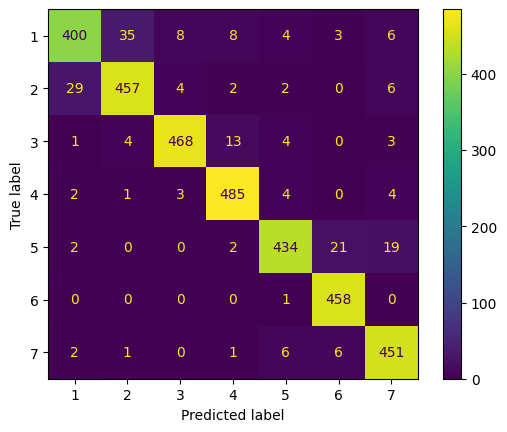

In [25]:
conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


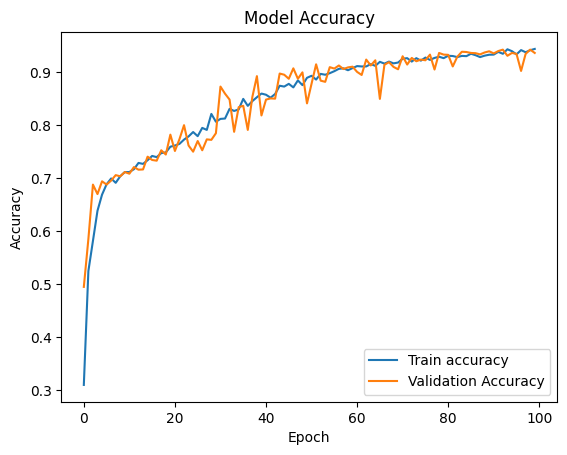

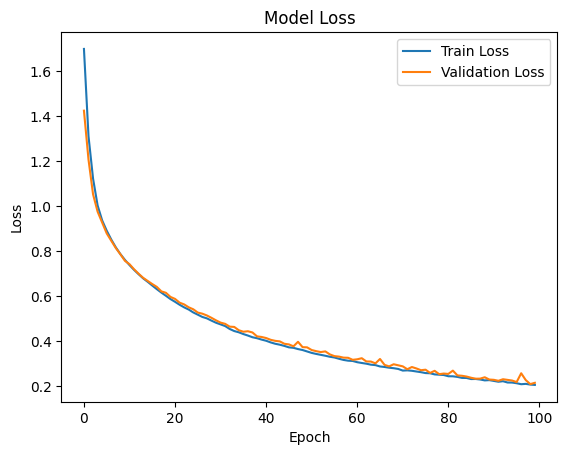

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation Accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()


In [27]:
model.save("./models/mlp_v3")
model = tf.keras.models.load_model("./models/mlp_v3/")

INFO:tensorflow:Assets written to: ./models/mlp_v3/assets


INFO:tensorflow:Assets written to: ./models/mlp_v3/assets
